# Self-Driving Car Engineer Nanodegree

## Term 1: Deep Learning

## Project 2: Build a Traffic Sign Recognition Classifier



----
## Step 1: Dataset Summary & Exploration

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Count of each class in list
[(0, 180), (1, 1980), (2, 2010), (3, 1260), (4, 1770), (5, 1650), (6, 360), (7, 1290), (8, 1260), (9, 1320), (10, 1800), (11, 1170), (12, 1890), (13, 1920), (14, 690), (15, 540), (16, 360), (17, 990), (18, 1080), (19, 180), (20, 300), (21, 270), (22, 330), (23, 450), (24, 240), (25, 1350), (26, 540), (27, 210), (28, 480), (29, 240), (30, 390), (31, 690), (32, 210), (33, 599), (34, 360), (35, 1080), (36, 330), (37, 180), (38, 1860), (39, 270), (40, 300), (41, 210), (42, 210)]


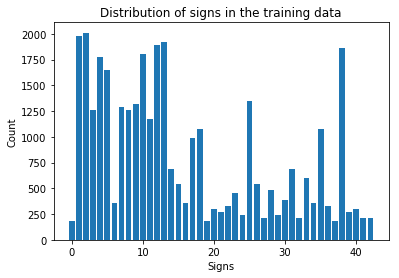

In [136]:
# Load pickled data
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.utils import shuffle
import time
# Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file='./valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


X_train = X_train.astype(float)
X_train = (X_train - 128)/128
# %%

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


# Visualizations will be shown in the notebook.
#%matplotlib inline

#index = random.randint(0, len(X_train))
#image = X_train[index].squeeze()
#show one example
#plt.figure(figsize=(1,1))
#plt.imshow(image)

#Count of each class
count = np.bincount(y_train)
ii = np.nonzero(count)[0]
freq = zip(ii, count[ii])

print('Count of each class in list')
print([i for i in freq])
plt.bar(range(len(ii)),count[ii])
plt.title('Distribution of signs in the training data')
plt.ylabel('Count')
plt.xlabel('Signs')
plt.savefig('writeup_plots/distribution.png')

plt.show()
#print('Class: ',y_train[index])


----

## Step 2: Design and Test a Model Architecture


### Model Architecture

In [166]:
def VGG_small(x):
    mu = 0
    sigma = 0.1
    strides = [1,1,1,1]
    # Conv Layer 1_1. Input = 32x32x3. Output = 32x32x64.
    F_W = tf.Variable(tf.truncated_normal([3,3,3,32], mean=mu, stddev=sigma))
    F_b = tf.Variable(tf.zeros(32))


    conv1_1 = tf.nn.conv2d(x, F_W, strides, 'SAME') + F_b
    conv1_1 = tf.nn.relu(conv1_1)
    
    # Conv Layer 1_2: Input 32x32x64. Output = 32x32x64
    F_W2 = tf.Variable(tf.truncated_normal([3,3,32,32], mean=mu, stddev=sigma))
    F_b2 = tf.Variable(tf.zeros(32))

    conv1_2 = tf.nn.conv2d(conv1_1, F_W2, strides, 'SAME') + F_b2
    conv1_2 = tf.nn.relu(conv1_2)
    
    # Pooling 1. Input = 32x32x64. Output = 16x16x64.
    pool1 = tf.nn.max_pool(conv1_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    # Conv Layer 2_1. Input = 16x16x64. Output = 16x16x128.
    F_W3 = tf.Variable(tf.truncated_normal([3,3,32,64], mean=mu, stddev=sigma))
    F_b3 = tf.Variable(tf.zeros(64))

    conv2_1 = tf.nn.conv2d(pool1, F_W3, strides, 'SAME') + F_b3
    conv2_1 = tf.nn.relu(conv2_1)
    
    # Conv Layer 2_2. Input = 16x16x128. Output = 16x16x128.
    F_W4 = tf.Variable(tf.truncated_normal([3,3,64,64], mean=mu, stddev=sigma))
    F_b4 = tf.Variable(tf.zeros(64))

    conv2_2 = tf.nn.conv2d(conv2_1, F_W4, strides, 'SAME') + F_b4
    conv2_2 = tf.nn.relu(conv2_2)
    
    # Pooling 2. Input = 16x16x128. Output = 8x8x128.
    pool2 = tf.nn.max_pool(conv2_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    
    """
    # Conv Layer 3_1. Input = 8x8x128. Output = 8x8x256.
    F_W5 = tf.Variable(tf.truncated_normal([3,3,128,256], mean=mu, stddev=sigma))
    F_b5 = tf.Variable(tf.zeros(256))

    conv3_1 = tf.nn.conv2d(pool2, F_W5, strides, 'SAME') + F_b5
    conv3_1 = tf.nn.relu(conv3_1)
    
    # Conv Layer 3_2. Input = 8x8x256. Output = 8x8x256.
    F_W6 = tf.Variable(tf.truncated_normal([3,3,256,256], mean=mu, stddev=sigma))
    F_b6 = tf.Variable(tf.zeros(256))

    conv3_2 = tf.nn.conv2d(conv3_1, F_W6, strides, 'SAME') + F_b6
    conv3_2 = tf.nn.relu(conv3_2)
    
    # Pooling 3. Input = 8x8x256. Output = 4x4x256.
    pool3 = tf.nn.max_pool(conv3_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    """
    
    # Flatten. Input = 8x8x128 = 8192. Output = 128
    F_W7 = tf.Variable(tf.truncated_normal([4096, 128], mean=mu, stddev=sigma))
    F_b7 = tf.Variable(tf.zeros(128))
    fc1 = tf.reshape(pool2, [-1, F_W7.get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, F_W7), F_b7)
    #fc1 = tf.contrib.layers.batch_norm(fc1, center=True, scale=True, is_training=phase, scope='bn1')
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Fully Connected Layer 2. Input = 128. Output = 43
    F_W8 = tf.Variable(tf.truncated_normal([128, n_classes], mean=mu, stddev=sigma))
    F_b8 = tf.Variable(tf.zeros(n_classes))
    fc2 = tf.add(tf.matmul(fc1, F_W8), F_b8)
    #fc2 = tf.contrib.layers.batch_norm(fc2, center=True, scale=True, is_training=phase, scope='bn2')
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    """
    # Fully Connected Layer 3. Input = 43. Output = 43    
    F_W9 = tf.Variable(tf.truncated_normal([n_classes, n_classes], mean=mu, stddev=sigma))
    F_b9 = tf.Variable(tf.zeros(n_classes))
    fc3 = tf.add(tf.matmul(fc2, F_W9), F_b9)
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)
    """
    
    F_W10 = tf.Variable(tf.truncated_normal([n_classes, n_classes], mean=mu, stddev=sigma))
    F_b10 = tf.Variable(tf.zeros(n_classes))
    logits = tf.add(tf.matmul(fc2, F_W10), F_b10)
    
    return logits
   

### Train, Validate and Test the Model

In [168]:
# %%
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)
#phase = tf.placeholder(tf.bool)

learning_rate = 5e-4
EPOCHS = 100
BATCH_SIZE = 128

logits = VGG_small(x)

# For decaying learning rate
global_step = tf.Variable(0, trainable=False)
decaying_rate = tf.train.exponential_decay(learning_rate, global_step, 100000, 0.94, staircase=True)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
#optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = tf.train.AdamOptimizer(decaying_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



In [169]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    starttime = time.time()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ... {:.2f}s passed".format(i, time.time()-starttime))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        
    saver.save(sess, './vgg')
    print("Model saved")


Training...

EPOCH 0 ... 4.86s passed
Validation Accuracy = 0.305

EPOCH 1 ... 9.69s passed
Validation Accuracy = 0.439

EPOCH 2 ... 14.54s passed
Validation Accuracy = 0.567

EPOCH 3 ... 19.35s passed
Validation Accuracy = 0.697

EPOCH 4 ... 24.12s passed
Validation Accuracy = 0.811

EPOCH 5 ... 28.91s passed
Validation Accuracy = 0.825

EPOCH 6 ... 33.87s passed
Validation Accuracy = 0.861

EPOCH 7 ... 38.74s passed
Validation Accuracy = 0.868

EPOCH 8 ... 43.59s passed
Validation Accuracy = 0.867

EPOCH 9 ... 48.39s passed
Validation Accuracy = 0.898

EPOCH 10 ... 53.26s passed
Validation Accuracy = 0.909

EPOCH 11 ... 58.08s passed
Validation Accuracy = 0.901

EPOCH 12 ... 62.90s passed
Validation Accuracy = 0.911

EPOCH 13 ... 67.73s passed
Validation Accuracy = 0.919

EPOCH 14 ... 72.54s passed
Validation Accuracy = 0.927

EPOCH 15 ... 77.40s passed
Validation Accuracy = 0.921

EPOCH 16 ... 82.24s passed
Validation Accuracy = 0.936

EPOCH 17 ... 87.16s passed
Validation Accuracy 

In [170]:
#Test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./vgg
Test Accuracy = 0.945


---

## Step 3: Test a Model on New Images


### Load and Output the Images / Top 5 Predictions

In [186]:
### Load the images and plot them here.
#from fnmatch import fnmatch
#import os
import matplotlib.image as mpimg
import PIL
from PIL import Image

#jpegs = [f for f in os.listdir("test_images/") if fnmatch(f, "*.jpg")]
width, height = 32, 32

# read csv as dict
df_signnames = pd.read_csv('./signnames.csv')

test_images = np.zeros((5,32,32,3))
for i in range(5):
    im = Image.open("test_images/"+str(i)+".jpg").resize((32,32), Image.ANTIALIAS)
    test_images[i] = np.array(im)
        
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    feed_dict = {x: test_images, y:[33, 14, 35, 25, 8], keep_prob: 1}
    classification = sess.run(tf.argmax(logits,1), feed_dict=feed_dict)
    prob = sess.run(logits, feed_dict=feed_dict)
    top5 = sess.run(tf.nn.top_k(tf.constant(prob), k=5))
    for i in range(5):
        print(classification[i], df_signnames[df_signnames.ClassId==classification[i]].SignName.values)
        
        top5labels = []
        for j in range(5):
            top5labels.append(df_signnames[df_signnames.ClassId==top5.indices[i][j]].SignName.values.item(0))
        
        print(top5.values[i], top5labels )

INFO:tensorflow:Restoring parameters from ./vgg
33 ['Turn right ahead']
[ 2391.6159668    950.82513428   341.95428467    62.56286621  -337.75045776] ['Turn right ahead', 'Ahead only', 'Go straight or right', 'Turn left ahead', 'Keep left']
35 ['Ahead only']
[ 4620.69384766  1384.34118652  -160.41996765  -217.21606445  -420.67388916] ['Ahead only', 'Speed limit (60km/h)', 'Go straight or left', 'Turn left ahead', 'Turn right ahead']
14 ['Stop']
[ 1623.36010742   702.17297363   184.70770264    99.19914246    10.5238409 ] ['Stop', 'End of all speed and passing limits', 'No entry', 'Speed limit (60km/h)', 'No vehicles']
25 ['Road work']
[ 238.97966003  141.88952637   41.54112625  -29.61777878  -33.98166656] ['Road work', 'Stop', 'No vehicles', 'Speed limit (50km/h)', 'Yield']
25 ['Road work']
[ 1189.90087891   570.29284668    77.31018829   -19.93891144  -338.28860474] ['Road work', 'Wild animals crossing', 'Bumpy road', 'Bicycles crossing', 'Yield']


---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")